## Ejercicio 05: Calculador de distancias entre palabras

Instruccines

En la semana 3 se trabajó en el reto 16 con el algoritmo de Análisis de componentes principales (PCA), en el cuál se obtuvo un gráfico en el que se mostraba la distribución de las palabras según si éstas eran más cercanas o más lejanas entre ellas (Basándose en sus Ebeddings). Mostrando algo como lo siguiente:

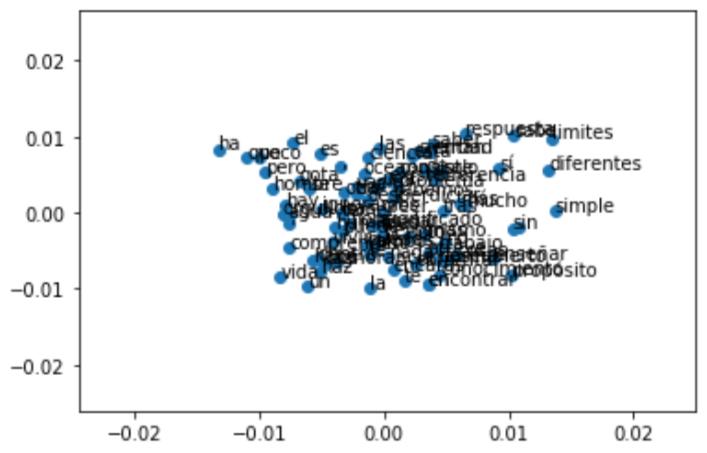

La imagen mostrada presenta las palabras analizadas después de aplicar Word Embeddings y análisis de componentes principales.

- Construir un script en este notebook de python que permita escribir 5 palabras como entrada del usuario, la lista la puede escribir el usuario en una celda por medio de "input" o puede estar asiganada al inicio en una lista como palabras = ["palabra1", "palabra2", ...]

- Utilizar el código de la semana 3 para asignar los valores de embeddings a dichas palabras, y posteriormente obtener su análisis de componentes principales (PCA)

- Obtener las coordenadas de posición de cada una de esas 5 palabras, similar a lo siguiente que se utilizó en el reto 16:
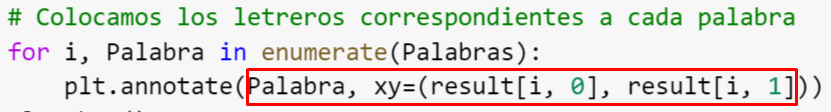

- Como éstos valores de coordenadas se encuentran en 2 dimensiones, es posible obtener la distancia entre éstos puntos por medio de distancias Euclidianas, entonces, determinar, cuales de las palabras introducidas por el usuario son más cercanas y cuales son mas lejanas basándose en el procedimiento anterior, e imprimirlo en pantalla.

Ejemplo:
Palabras = ["Perros", "Gatos", "Casas", "Hombre", "Mujer"]
Resultado:
Las dos palabras más cercanas entre sí son Hombre y Mujer
Las dos palabras más lejanas entre sí son Hombre y Casas

- Imprimir el diagrama "skatter" donde se muestren los 5 puntos de palabras introducidas después del análisis por PCA

NOTA: Puee que algunas palabras que introduzca no se puedan visualizar si no tienen un valor definido por Word2vect

Suerte!


In [1]:
# Importar el modelo de word2vect de Google y las librerías necesarias
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import spacy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Entradas del usuario
nlp_es = spacy.load("es_core_news_sm")

Entradas = [nlp_es(u'Perro'), 
            nlp_es(u'Gato'), 
            nlp_es(u'Humano'),
            nlp_es(u'Casa'),
            nlp_es(u'Rey'),
            nlp_es(u'Palacio')]

In [2]:
Frases_Tokens = []
for Entrada in Entradas:
    Tokens = []
    for Token in Entrada:
        Tokens.append(Token.text.lower())
    Frases_Tokens.append(Tokens)  

# Entrenamos un modelo con nuestros tokens y los Embeddings de Word2vect
Modelo = Word2Vec(Frases_Tokens,min_count = 1, size=10, alpha=0.25)
print("Características del modelo: " + str(Modelo))

# Obtenemos las palabras que conforman nuestro vocabulario
# (No todas las palabras necesariamente tienen asociado un vector de embeddings)
Palabras = list(Modelo.wv.vocab)
print("\nVocabulario: " + str(Palabras))

Características del modelo: Word2Vec(vocab=6, size=10, alpha=0.25)

Vocabulario: ['perro', 'gato', 'humano', 'casa', 'rey', 'palacio']


C:\Users\Irving\Miniconda3\envs\pln_2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


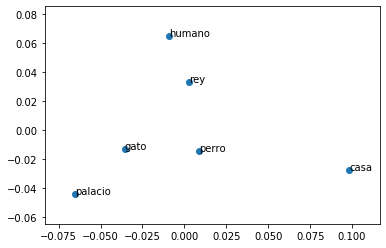

In [3]:
# Extraemos el vocabulario del modelo y lo igresamos 
# en un PCA
Caract = Modelo[Modelo.wv.vocab]
pca = PCA(n_components = len(Caract))
result = pca.fit_transform(Caract)

# Creamos un scatter plot del PCA obtenido
# y añadimos los puntos al gráfico
plt.scatter(result[:, 0], result[:, 1])
Palabras = list(Modelo.wv.vocab)

# Colocamos los letreros correspondientes a cada palabra
for i, Palabra in enumerate(Palabras):
    plt.annotate(Palabra, xy=(result[i, 0], result[i, 1]))
plt.show()

In [4]:
# Extractor de palabras más cercanas o más lejanas:
import numpy as np

Distancias = dict()

for i in range(len(result)-1):
    for j in range(len(result)-i-1):
        x1 = result[i, 0]
        y1 = result[i, 1]
        x2 = result[j+i+1, 0]
        y2 = result[j+i+1, 1]
        
        dist = (x2-x1)*(x2-x1) + (y2-y1)*(y2-y1) 
        Distancias.setdefault(str(dist), Palabras[i] + " - " + Palabras[j+1+i])

# Convertimos los números a decimales para encontrarlos en el diccionario
Numeros = list()
for text in Distancias.keys():
    num = float(text)
    Numeros.append(num)
    
print(max(Numeros))
print("Las palabras con la mayor distancia son: " + str(Distancias[str(max(Numeros))]))

print(min(Numeros))
print("Las palabras con la menor distancia son: " + str(Distancias[str(min(Numeros))]))

0.027044134
Las palabras con la mayor distancia son: casa - palacio
0.001119227
Las palabras con la menor distancia son: humano - rey
